<h1 align=center> Bidirectional RNN In Depth </h1>

- A Bidirectional Recurrent Neural Network (BRNN) is a type of Recurrent Neural Network (RNN) that is designed to improve the performance of traditional RNNs by processing data in both forward and backward directions
- This architecture allows the network to have information from both past and future contexts, which can be particularly useful for tasks where context from both directions is crucial, such as language processing, speech recognition, and time-series analysis

### How BRNN Works

- A standard RNN processes input data in a sequence, maintaining a hidden state that gets updated at each step based on the current input and the previous hidden state. However, a standard RNN only uses past context, which can be a limitation for certain tasks.
- A BRNN addresses this by having two separate hidden states: one that processes the sequence from start to end (forward direction) and another that processes it from end to start (backward direction). The outputs from these two hidden states are then combined (usually concatenated) to form the final output.

### Structure

1. **Forward RNN**: Processes the input sequence from t=1 to t=T.
2. **Backward RNN**: Processes the input sequence from t=T to t=1.
3. **Concatenation**: The outputs from the forward and backward RNNs are concatenated to form the final output at each time step.

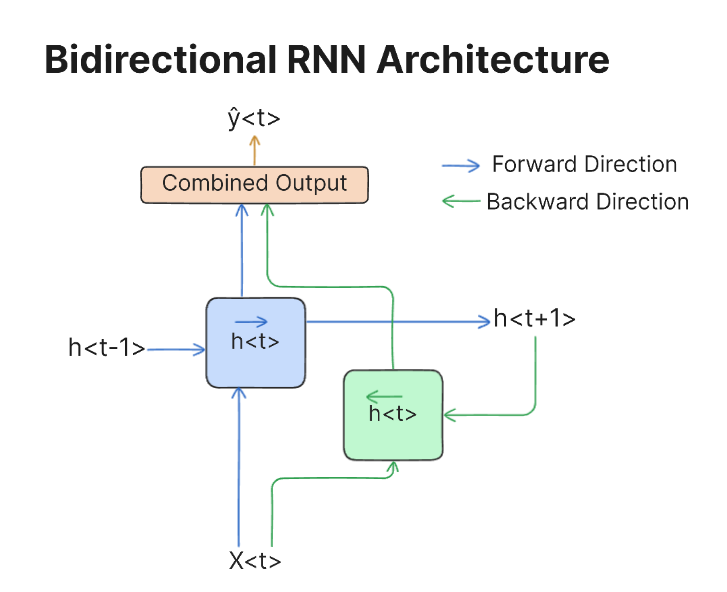

### Mathematical Representation

For a given input sequence X=(x1,x2,…,xT):

**Forward RNN:**

$$
\overrightarrow{h}^{<t>} = g(W_xX^{<t>} + W_h \overrightarrow{h}^{<t-1>}+b_h)\\ \overrightarrow{y}^{<t>}=W_y\overrightarrow{h}^{<t>}+b_y
$$

- X<t>: is the input at time step t
- W_x: is the weight matrix for the input
- W_h: is the weight matrix for the hidden state from the previous time step
- W_y: is the weight matrix from the hidden state to the output
- h→<t−1>:is the hidden state from the previous time step
- b_h, b_y: are the bias terms
- g: activation function, typically a non-linear function like tanh or ReLU
- y→<t>: is the output at time step t

**Backward RNN:**

$$
\overleftarrow{h}^{<t>} = \sigma(W_xX^{<t>} + W_h \overleftarrow{h}^{<t+1>}+b_h)\\ \overleftarrow{y}^{<t>}=W_y\overleftarrow{h}^{<t>}+b_y
$$

- X<t>: is the input at time step t (same as in the forward RNN)
- W_x W_h, and bh are the same matrices and bias term used in the forward RNN but applied in the reverse order
- h←<t+1>: is the hidden state from the next time step (as we are processing backward)
- The output transformation is similar to the forward RNN's output transformation

**Combined Output:**

$$
\hat{y}^{<t>} = f(\overrightarrow{y}^{<t>}, \overleftarrow{y}^{<t>})\\ \text{Typically, the function f used to combine the outputs is concatenation:}\\\hat{y}^{<t>} = [\overrightarrow{y}^{<t>}; \overleftarrow{y}^{<t>}]
$$

- Here, [;] denotes the concatenation operation, resulting in a vector that contains both

**Below is the BRNN architecture for t=3:**

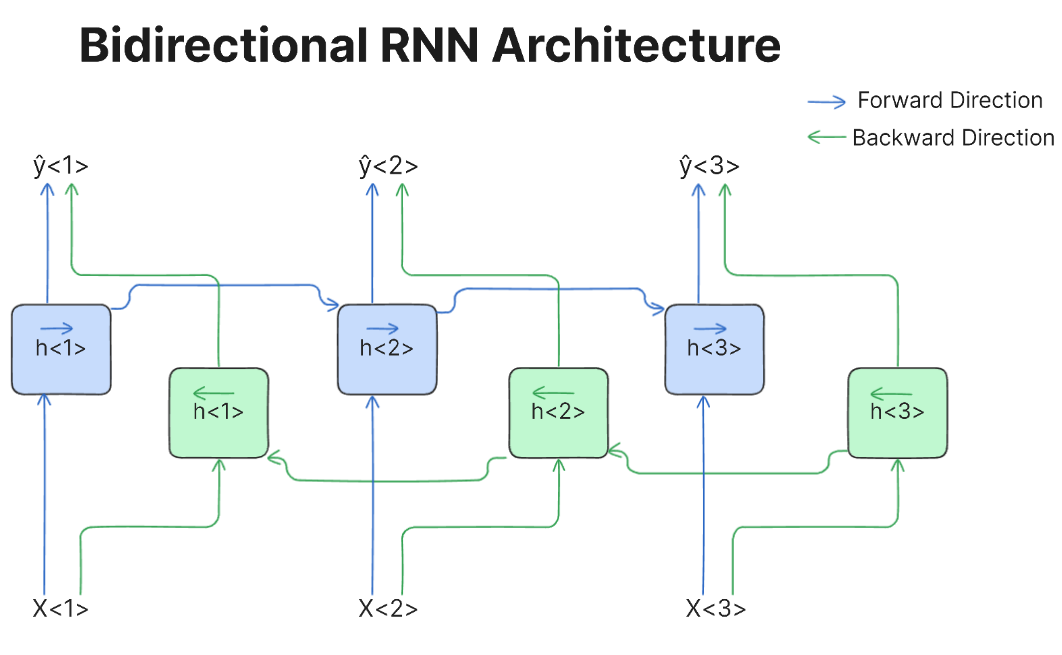

**Below is a simple RNN for t=3:**

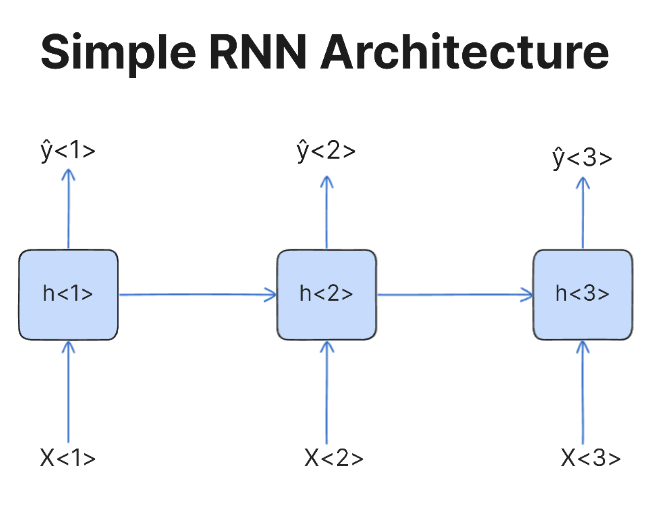

### Bidirectional Recurrent Neural Networks (BRNNs) can be built using various types of recurrent units. The most commonly used types include:

**1. Bidirectional SimpleRNN (BSimpleRNN)**:

- A simple form of recurrent unit
- Computes the output as a weighted sum of the current input and the previous hidden state
- It’s simple, but it may suffer from the vanishing gradient problem, especially in long sequences

**2. Bidirectional Long Short-Term Memory (BLSTM)**:

- Incorporates memory cells to retain information over long sequences
- Gates (input, forget, and output gates) are employed to regulate the flow of information
- Effectively addresses the vanishing gradient problem, making it more effective for capturing long-term dependencies

**3. Bidirectional Gated Recurrent Unit (BGRU)**:

- Similar to LSTM but with a simpler architecture
- Combines the forget and input gates into a single “update gate” and merges the cell state and hidden state
- Offers comparable performance to LSTM while being computationally more efficient


### Pros of BRNNs

**1. Better Understanding**:

- **Why**: They look at data from both the past and the future
- **Example**: When reading a sentence, knowing the words before and after helps understand the meaning better

**2. More Accurate**:

- **Why**: They consider more information, leading to better predictions
- **Example**: In tasks like translating languages or recognizing speech, this leads to fewer mistakes

**3. Handles Ambiguity**:

- **Why**: They use context from both directions to clear up confusion
- **Example**: Understanding whether “lead” refers to a metal or the act of leading by looking at surrounding words

### Cons of BRNNs

**1. Slower to Compute**:

- **Why**: They process the data twice, once forward and once backward
- **Example**: It takes longer to train and run on large datasets

**2. Uses More Memory**:

- **Why**: Storing hidden states in both directions uses more memory
- **Example**: This can be a problem when working with long sequences or limited hardware

**3. More Complex to Build**:

- **Why**: They need careful handling of both forward and backward passes
- **Example**: Harder to implement correctly compared to simpler models

**4. Delay in Real-Time**:

- **Why**: They need to see the whole sequence before making a decision
- **Example**: Not suitable for tasks that need immediate responses, like real-time speech recognition